### 为什么要对数据进行可视化的操作？

### 购买记录的分析

In [14]:
import pandas as pd

m_cols = ['Time', 'Action', 'User', 'Product', 'Quantity', 'Price']

orders = pd.read_csv('purchase_order.tab', sep='\t', parse_dates=[0], names=m_cols, encoding='utf-8')
orders.head()

,Time,Action,User,Product,Quantity,Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0


In [2]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 6 columns):
Time        54772 non-null datetime64[ns]
Action      54772 non-null object
User        54772 non-null object
Product     54772 non-null object
Quantity    54772 non-null int64
Price       54721 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.5+ MB


In [4]:
orders[orders['Product'] == 'P0006944501']
orders[orders['Product'] == 'P0006944501']['Price']

0       1069.0
9       1069.0
775     1069.0
2511    1069.0
2515    1069.0
2522    1069.0
5457    1069.0
5706    1069.0
Name: Price, dtype: float64

In [5]:
orders[orders['Product'] == 'P0006944501']['Price'].describe()

count       8.0
mean     1069.0
std         0.0
min      1069.0
25%      1069.0
50%      1069.0
75%      1069.0
max      1069.0
Name: Price, dtype: float64

In [7]:
len(orders['Product'].unique())

20054

In [8]:
#如何查看每种商品的平均价格？
#sql: select product, avg(price) from orders group by product limit 5
orders.groupby('Product')['Price'].mean().head()

Product
P0000005913       1590.0
P0000006020       1290.0
P0000006591        999.0
P0000007744       3280.0
P0000008190011    5083.0
Name: Price, dtype: float64

In [9]:
orders.groupby('Product')['Price'].mean().sort_values(ascending=False).head()

Product
P0000143511    438888.0
P0000143500    438888.0
P0006584093    320000.0
P0025280275    183900.0
P0000150006    111375.0
Name: Price, dtype: float64

In [10]:
orders['Total_Price'] = orders['Quantity'] * orders['Price']
orders.head()

,Time,Action,User,Product,Quantity,Price,Total_Price
0,2015-07-01 00:00:01,order,U312622727,P0006944501,1,1069.0,1069.0
1,2015-07-01 00:00:03,order,U239012343,P0006018073,1,1680.0,1680.0
2,2015-07-01 00:00:19,order,U10007697373,P0002267974,1,285.0,285.0
3,2015-07-01 00:01:10,order,U296328517,P0016144236,1,550.0,550.0
4,2015-07-01 00:01:36,order,U300884570,P0014516980122,1,249.0,249.0


In [11]:
#分析每个用户消费的总金额，并降序排序
# select user, sum(total_price) from orders group by user order by sum(total_price) desc limit 5
orders.groupby('User')['Total_Price'].sum().sort_values(ascending=False).head()

User
U166708333      2942744.0
U10120098943    1451117.0
U142809250       747550.0
U1006283751      515688.0
U10114715330     456782.0
Name: Total_Price, dtype: float64

In [13]:
import pandas as pd

m_cols = ['Time', 'Action', 'User', 'Product']

views = pd.read_csv('purchase_view.tab', sep='\t', parse_dates=[0], names=m_cols, encoding='utf-8')
views.head()

,Time,Action,User,Product
0,2015-07-01 00:00:01,view,U129297265,P0023468384
1,2015-07-01 00:00:03,view,U321001337,P0018926456
2,2015-07-01 00:00:05,view,U10070718237,P0000063593
3,2015-07-01 00:00:05,view,U393805241,P0005541535
4,2015-07-01 00:00:10,view,U10004621134,P0022135540


In [15]:
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191486 entries, 0 to 1191485
Data columns (total 4 columns):
Time       1191486 non-null datetime64[ns]
Action     1191486 non-null object
User       1191486 non-null object
Product    1191486 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 36.4+ MB


In [18]:
#每个用户购买的每种产品的数目
orders.groupby(['User', 'Product'])['Product'].count().reset_index(name='buys')
orders_cnt = orders.groupby(['User', 'Product'])['Product'].count().reset_index(name='buys')
orders_cnt.head()

,User,Product,buys
0,U1000001354,P0014520085,1
1,U10000044910,P0018800250,1
2,U10000056953,P0003926850034,1
3,U10000056953,P0013344760004,2
4,U10000056953,P0013834251,1


In [19]:
#每个用户浏览每种产品的数目
views_cnt = views.groupby(['User', 'Product'])['Product'].count().reset_index(name='views')
views_cnt.head()

,User,Product,views
0,None,PNone,1
1,U10000000225,P0007107111,1
2,U10000000225,P0007107122,1
3,U10000000225,P0007107413,1
4,U10000000225,P0009440001,1


In [26]:
views['Time'].dt.date.head()
views['Time'].dt.hour.head()
views['Time'].head()
views['Time'].dt.month.head()

0    7
1    7
2    7
3    7
4    7
Name: Time, dtype: int64

In [29]:
#按浏览日期来统计浏览量
views_cnt_by_dates = views.groupby(views['Time'].dt.date)['Action'].count()
views_cnt_by_dates.head()

Time
2015-07-01    24569
2015-07-02    17043
2015-07-03    28041
2015-07-04    28625
2015-07-05    15522
Name: Action, dtype: int64

#### matplotlib

Populating the interactive namespace from numpy and matplotlib


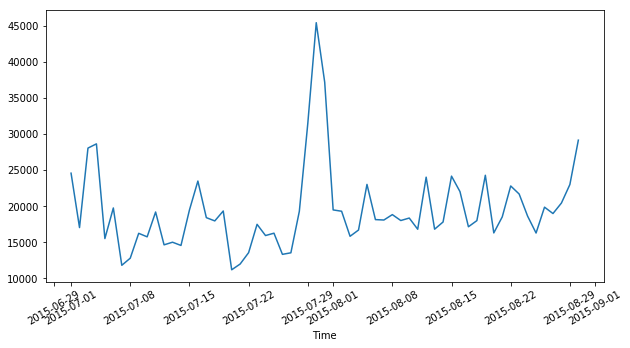

In [31]:
%pylab inline

views_cnt_by_dates.plot(kind='line', figsize=[10, 5], rot=30)

In [32]:
#按浏览日期来统计浏览量
views_cnt_by_hours = views.groupby(views['Time'].dt.hour)['Action'].count()
views_cnt_by_hours.head()

Time
0    69806
1    42582
2    24408
3    15930
4    10563
Name: Action, dtype: int64

Populating the interactive namespace from numpy and matplotlib


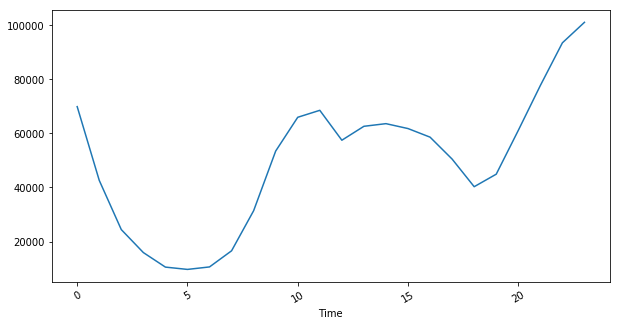

In [33]:
%pylab inline

views_cnt_by_hours.plot(kind='line', figsize=[10, 5], rot=30)

In [37]:
orders_cnt_by_dates = orders.groupby(orders['Time'].dt.date)['Action'].count()

In [39]:
df = pd.concat([orders_cnt_by_dates, views_cnt_by_dates], axis=1, sort=False)
df.dropna(inplace=True)
df.columns = ['Orders', 'Views']
df.head()

,Orders,Views
2015-07-01,2324.0,24569
2015-07-02,2059.0,17043
2015-07-03,1778.0,28041
2015-07-04,2166.0,28625
2015-07-05,1413.0,15522


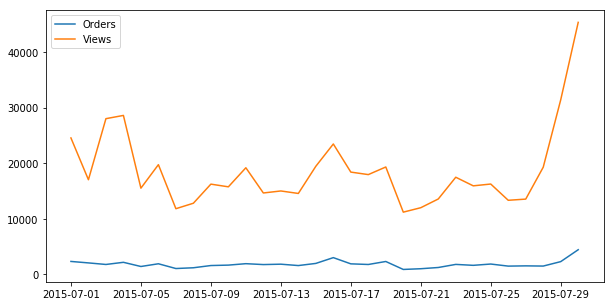

In [40]:
df.plot(kind='line', figsize=[10, 5])